 ## เขียนโปรแกรมใน cell ที่มีคำถาม

In [65]:
### ใช้ข้อมูลที่กำหนดมาสร้างเป็น dataframe 
# Interest_Rate คืออัตราดอกเบี้ยเงินฝาก
# Unemployment_Rate คืออัตราการว่างงาน
# Stock_Index_Price คือดัชนีราคาหุ้น
import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline  

import matplotlib.pyplot as plt
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]}        

In [66]:
#จากข้อมูลข้างต้น Stock_Market เป็น data type ประเภทใด
type(Stock_Market)
#Stock_Market เป็น data type ประเภท dictionary

dict

In [67]:
df.columns

Index(['Year', 'Month', 'Interest_Rate', 'Unemployment_Rate',
       'Stock_Index_Price'],
      dtype='object')

In [68]:
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


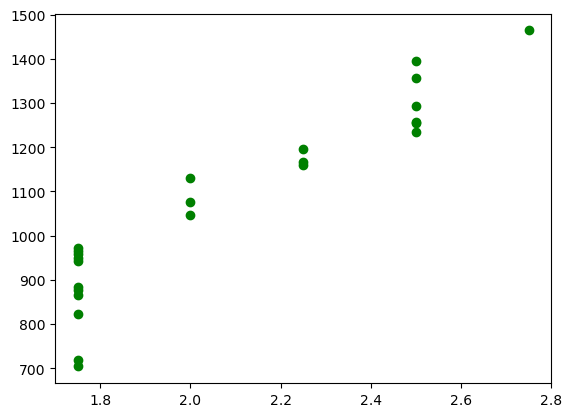

In [69]:
### 1. พิจารณาว่าข้อมูลมีความสัมพัน์กันหรือไม่ โดย scattter plot
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='green')

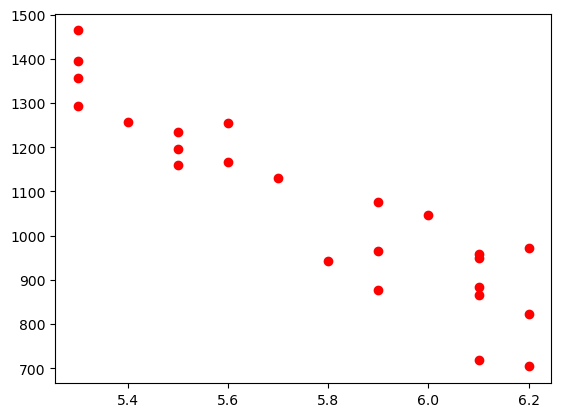

In [70]:
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='red')

In [71]:
### 2. หาค่า correlation
print(df.corr())

                           Year         Month  Interest_Rate  \
Year               1.000000e+00  7.884865e-14       0.882851   
Month              7.884865e-14  1.000000e+00       0.339526   
Interest_Rate      8.828507e-01  3.395257e-01       1.000000   
Unemployment_Rate -8.769997e-01 -3.511891e-01      -0.925814   
Stock_Index_Price  8.632321e-01  4.812873e-01       0.935793   

                   Unemployment_Rate  Stock_Index_Price  
Year                       -0.877000           0.863232  
Month                      -0.351189           0.481287  
Interest_Rate              -0.925814           0.935793  
Unemployment_Rate           1.000000          -0.922338  
Stock_Index_Price          -0.922338           1.000000  


In [72]:
### 3. พิจารณาว่าตัวแปรใดเป็นตัวแปรตาม และตัวแปรอิสระ 
### เมื่อพิารณาได้แล้ว หา regression model เพื่อพยากรณ์ตัวแปรตามนั้น
ad_all_ols = sm.ols(formula="Stock_Index_Price ~ Unemployment_Rate + Interest_Rate ", data=df).fit()
ad_all_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           4.04e-11
Time:                        16:02:23   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1798.4040    899.248      2.000      0.059     -71.685    3668.493
Unemployment_Rate  -250.1466    117.950     -2.121      0.046    -495.437      -4.856
Interest_Rate       345.5401    111.367      3.103      0.005     113.940     577.140
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.551
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                         394.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. เขียนสมการ Linear Regression ที่ได้จากข้อ 3
$$
Y = \beta_0 + \beta_1*Unemployment_Rate + \beta_2*Interest_Rate
$$

In [73]:
### 5. ถ้ามีข้อมูลใหม่ดังนี้ 
# Interest_Rate คืออัตราดอกเบี้ยเงินฝาก = 2.75
# Unemployment_Rate คืออัตราการว่างงาน = 5.3

# ใช่สมการที่ได้้จากข้อ 4 คำนวณข้อมูลใหม่ดังกล่าว 

data = {'Interest_Rate': [2.75],'Unemployment_Rate': [5.3]}        
newdata = pd.DataFrame(data)
newdata.head()
print(ad_all_ols.predict(newdata))

0    1422.862389
dtype: float64


In [74]:
#เมื่ออัตราการว่างงาน 7.8 อัตราดอกเบี้ยเงินฝาก 2.7 จะส่งผลให้ดัชนีราคาหุ้น = ???

data = {'Interest_Rate': [2.7],'Unemployment_Rate': [7.8]}        
data = pd.DataFrame(data)
data.head()


,Interest_Rate,Unemployment_Rate
0,7.8,2.7


In [75]:
data = {'Interest_Rate': [2.7],'Unemployment_Rate': [7.8]}       
newdata = pd.DataFrame(data)
newdata.head()
print(ad_all_ols.predict(newdata))

0    3818.220914
dtype: float64
